# Setup


In [1]:
!git clone https://github.com/anminhhung/fast_config_polygon

Cloning into 'fast_config_polygon'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 0), reused 9 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), 855.70 KiB | 2.42 MiB/s, done.


In [2]:
%cd fast_config_polygon

/content/fast_config_polygon


# Read Image

In [8]:
import cv2

list_images = []

image = cv2.imread("image/demo1.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
list_images.append(image)

### Config Bounding box

In [5]:
import colab_utils

gt_bboxes = []
colab_utils.annotate_bbox(list_images, box_storage_pointer=gt_bboxes)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'--boxes array populated--'

<IPython.core.display.Javascript object>

In [6]:
print(gt_bboxes) # format ([y_min, x_min, y_max, x_max])

[array([[0.67773438, 0.02040816, 0.96106771, 0.4829932 ]])]


735 416
14 281 355 399


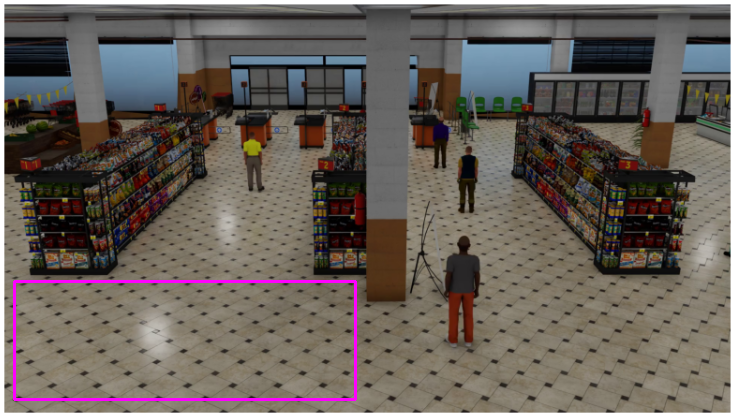

In [7]:
# cv2 show
from google.colab.patches import cv2_imshow

height, width, channels = image.shape 

print(width, height)
# convert coordinates
bbox = gt_bboxes[0][0]
y1 = int(bbox[0] * height) 
x1 = int(bbox[1] * width) 
y2 = int(bbox[2] * height)
x2 = int(bbox[3] * width)

print(x1, y1, x2, y2)

draw_image = cv2.rectangle(image, (x1, y1), (x2, y2), (255,0,255), 2)
draw_image = cv2.cvtColor(draw_image, cv2.COLOR_BGR2RGB)
cv2_imshow(draw_image)

### Config polygon 

In [9]:
import colab_utils

gt_polygons = []
colab_utils.annotate_polygon(list_images, polygon_storage_pointer=gt_polygons)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'--polygons array populated--'

<IPython.core.display.Javascript object>

In [10]:
print(gt_polygons)

[array([[[0.03537415, 0.69106771],
        [0.17414966, 0.68440104],
        [0.27210884, 0.48940104],
        [0.39455782, 0.48940104],
        [0.41632653, 0.68606771],
        [0.48027211, 0.69273438],
        [0.48435374, 0.91940104],
        [0.0829932 , 0.92440104]]])]


In [16]:
np_coords = gt_polygons[0][0]
height, width, channels = image.shape 

list_coords = [[int(coord[0]*width), int(coord[1]*height)] for coord in np_coords]
list_coords

[[26, 287],
 [127, 284],
 [200, 203],
 [290, 203],
 [306, 285],
 [353, 288],
 [356, 382],
 [61, 384]]

735 416


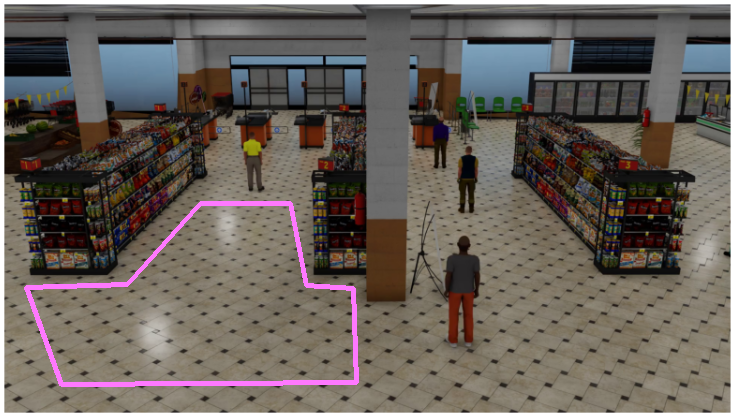

In [17]:
# cv2 show
from google.colab.patches import cv2_imshow
import numpy as np 

height, width, channels = image.shape 

print(width, height)
# convert coordinates
np_coords = gt_polygons[0][0]
list_coords = [[int(coord[0]*width), int(coord[1]*height)] for coord in np_coords]
coords = np.array(list_coords)

draw_image = cv2.polylines(image, [coords], True, (255,120,255),3)

draw_image = cv2.cvtColor(draw_image, cv2.COLOR_BGR2RGB)
cv2_imshow(draw_image)

# List image 

### Bounding box 

In [18]:
import cv2
from glob import glob

list_images = []
for filepath in sorted(glob('image/*.png')):
    bgr_image = cv2.imread(filepath)
    rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    list_images.append(rgb_image)

In [19]:
import colab_utils

gt_bboxes = []
colab_utils.annotate_bbox(list_images, box_storage_pointer=gt_bboxes)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'--boxes array populated--'

<IPython.core.display.Javascript object>

In [20]:
print(gt_bboxes)

[array([[0.68106771, 0.04353741, 0.96106771, 0.45578231]]), array([[0.31606771, 0.39918256, 0.97273437, 0.69209809]])]


### Polygon 

In [22]:
import colab_utils

gt_polygons = []
colab_utils.annotate_polygon(list_images, polygon_storage_pointer=gt_polygons)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'--polygons array populated--'

<IPython.core.display.Javascript object>

In [23]:
print(gt_polygons)

[array([[[0.04897959, 0.69606771],
        [0.15646259, 0.69606771],
        [0.26530612, 0.48606771],
        [0.40680272, 0.47606771],
        [0.40544218, 0.68773438],
        [0.47619048, 0.71273438],
        [0.47346939, 0.86773437],
        [0.47346939, 0.86773437],
        [0.05170068, 0.88273437]]]), array([[[0.23978202, 0.76606771],
        [0.38010899, 0.76273437],
        [0.46321526, 0.37273438],
        [0.67983651, 0.38440104],
        [0.73160763, 0.81440104],
        [0.86648501, 0.90773437],
        [0.8133515 , 0.96273438],
        [0.21117166, 0.95606771]]])]
